In [1]:
import DEMs
from osgeo import gdal

In [2]:
bbox = (120570, 487570, 120970, 487870)

buildings_object = DEMs.Buildings(bbox)
buildings = buildings_object.building_geometries


loaded


In [3]:
dems = DEMs.DEMS(bbox, buildings, bridge=True)
dtm = dems.dtm
dsm = dems.dsm


File written to 'output/final_dtm.tif'
File written to 'output/final_dsm_over.tif'


In [4]:
chm = DEMs.CHM(bbox, dtm, 0.25, "output", "temp")

Tiles covering the area: ['25EZ1_21']
0.5
File written to 'output\CHM.TIF'


In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_raster(array, title="DSM original"):
        plt.figure(figsize=(10, 8), facecolor="white")
        ax = plt.gca()
        ax.set_facecolor("white")
        plt.imshow(array, cmap="viridis", origin="upper")
        plt.colorbar(label="Elevation (m)")
        plt.title(title)
        plt.show()

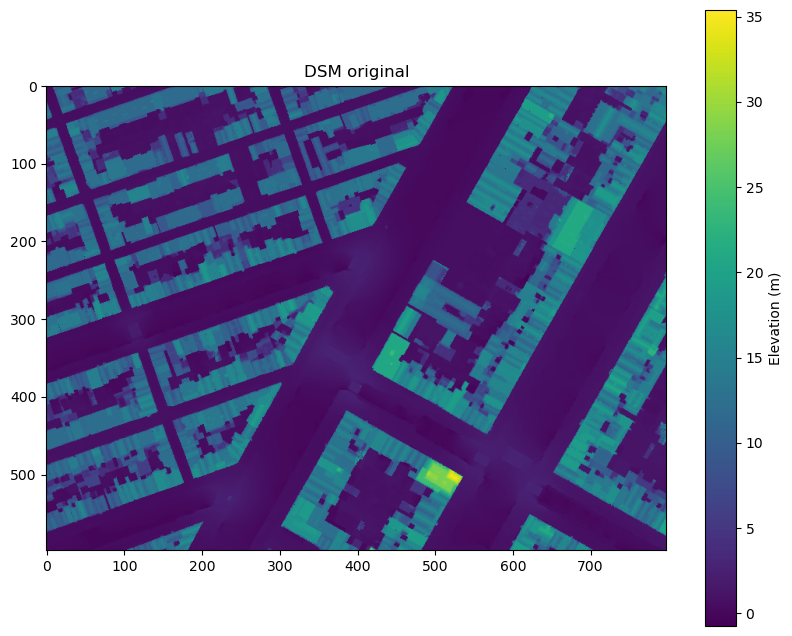

In [7]:
plot_raster(dsm)

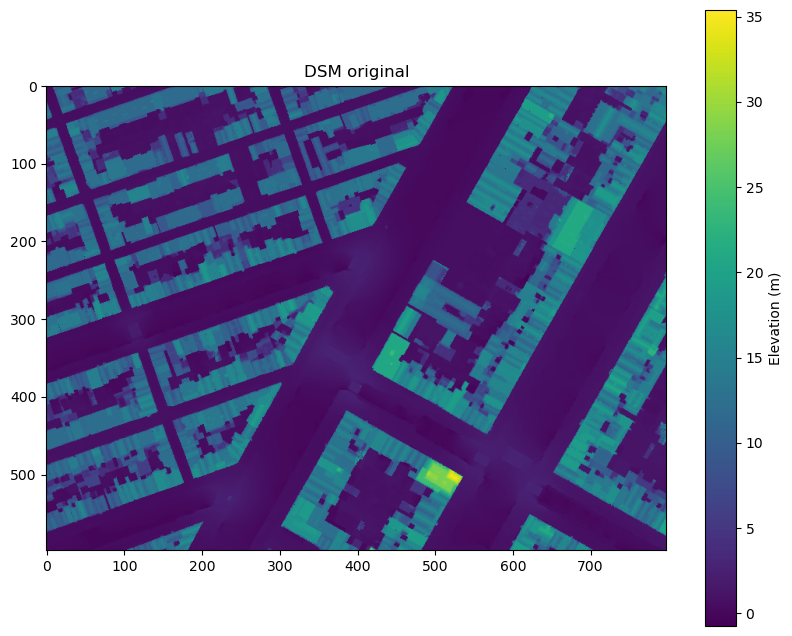

In [8]:
plot_raster(dsm)

In [9]:
remove_list = ["NL.IMBAG.Pand.0363100012172425", "NL.IMBAG.Pand.0363100012172367"]

In [10]:
dems.remove_buildings(remove_list, [], buildings_object.building_geometries, buildings_object.user_buildings)

Parcel IDs being checked (to_remove): ['NL.IMBAG.Pand.0363100012173340', 'NL.IMBAG.Pand.0363100012239612', 'NL.IMBAG.Pand.0363100012239612', 'NL.IMBAG.Pand.0363100012173051', 'NL.IMBAG.Pand.0363100012173051', 'NL.IMBAG.Pand.0363100012173048', 'NL.IMBAG.Pand.0363100012173048', 'NL.IMBAG.Pand.0363100012173049', 'NL.IMBAG.Pand.0363100012173049', 'NL.IMBAG.Pand.0363100012172858', 'NL.IMBAG.Pand.0363100012173054', 'NL.IMBAG.Pand.0363100012172859', 'NL.IMBAG.Pand.0363100012172859', 'NL.IMBAG.Pand.0363100012172859', 'NL.IMBAG.Pand.0363100012173055', 'NL.IMBAG.Pand.0363100012173341', 'NL.IMBAG.Pand.0363100012173341', 'NL.IMBAG.Pand.0363100012173341', 'NL.IMBAG.Pand.0363100012173344', 'NL.IMBAG.Pand.0363100012173344', 'NL.IMBAG.Pand.0363100012173339', 'NL.IMBAG.Pand.0363100012173135', 'NL.IMBAG.Pand.0363100012173135', 'NL.IMBAG.Pand.0363100012173135', 'NL.IMBAG.Pand.0363100012173133', 'NL.IMBAG.Pand.0363100012173133', 'NL.IMBAG.Pand.0363100012173133', 'NL.IMBAG.Pand.0363100012173343', 'NL.IMBAG

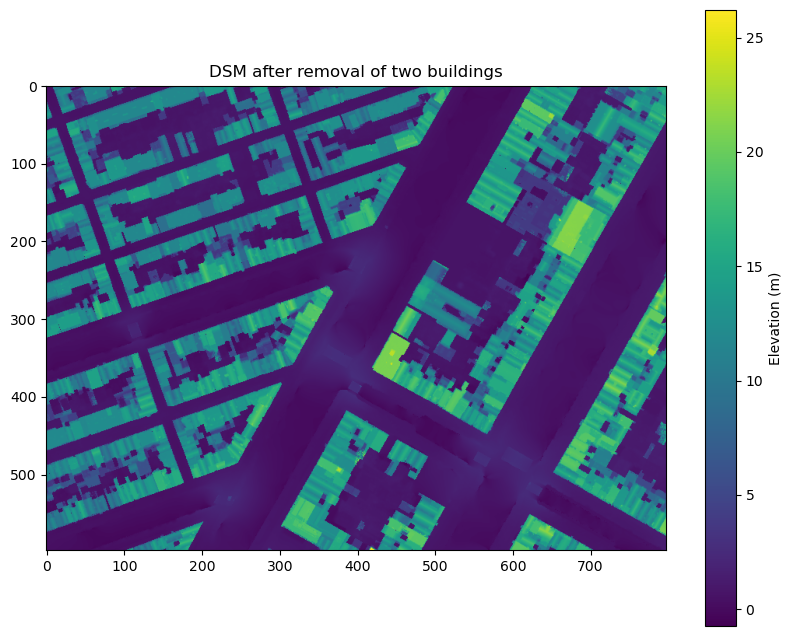

In [11]:
plot_raster(dsm, "DSM after removal of two buildings")

In [12]:
import numpy as np
userbuilding_gdal1 = gdal.Open("../j_testing/output/ams_test0.tiff")
user_array1 = userbuilding_gdal1.GetRasterBand(1).ReadAsArray()

userbuilding_gdal2 = gdal.Open("../j_testing/output/ams_test1.tiff")
user_array2 = userbuilding_gdal2.GetRasterBand(1).ReadAsArray()

userbuilding_gdal3 = gdal.Open("../j_testing/output/ams_test2.tiff")
user_array3 = userbuilding_gdal3.GetRasterBand(1).ReadAsArray()

merged_array = np.stack([user_array1, user_array2, user_array3], axis=0)
print(merged_array.shape)

highest = gdal.Open("../j_testing/output/ams_highest.tiff")
highest_array = highest.GetRasterBand(1).ReadAsArray()

(3, 598, 798)


In [13]:
buildings_object.insert_user_buildings( highest_array=highest_array, transform=dems.transform,footprint_array=merged_array[0])

In [14]:
dems.update_dsm(buildings_object.user_buildings, user_arrays=merged_array, higher_buildings=buildings_object.user_buildings_higher)

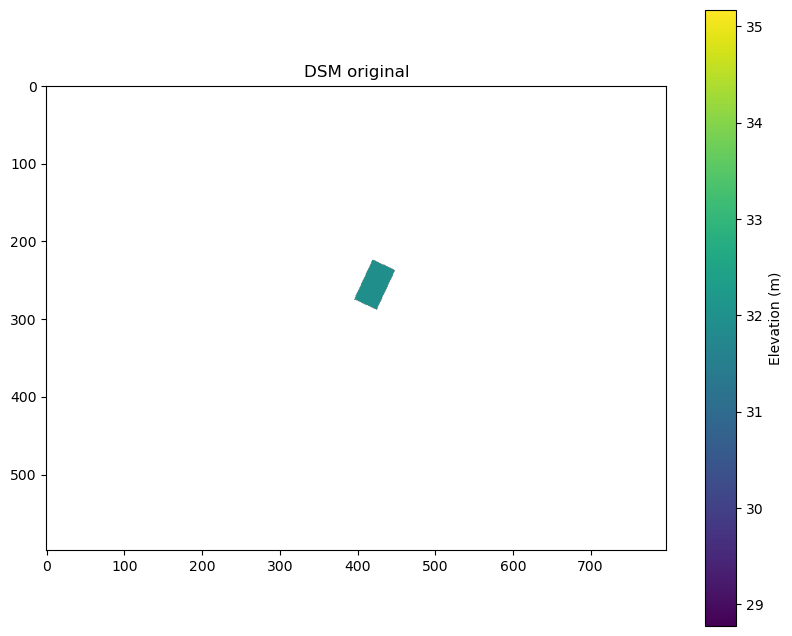

In [15]:
plot_raster(dems.dsm[1])

In [25]:
buildings_object.remove_user_buildings('e633732a')

In [26]:
dems.remove_buildings([], buildings_object.removed_user_buildings, buildings_object.user_buildings, buildings_object.user_buildings_higher, buildings_object.user_buildings_higher)

Parcel IDs being checked (to_remove): ['e633732a', 'e633732a']
Parcel IDs being checked (to_remove_user): ['e633732a']
[{'geometry': {'type': 'Polygon', 'coordinates': (((120775.0, 487759.5), (120776.0, 487759.5), (120776.0, 487759.0), (120777.0, 487759.0), (120777.0, 487758.5), (120778.0, 487758.5), (120778.0, 487758.0), (120779.0, 487758.0), (120779.0, 487757.5), (120780.5, 487757.5), (120780.5, 487757.0), (120781.5, 487757.0), (120781.5, 487756.5), (120782.5, 487756.5), (120782.5, 487756.0), (120783.5, 487756.0), (120783.5, 487755.5), (120784.5, 487755.5), (120784.5, 487755.0), (120785.5, 487755.0), (120785.5, 487754.5), (120786.5, 487754.5), (120786.5, 487754.0), (120788.0, 487754.0), (120788.0, 487753.5), (120789.0, 487753.5), (120789.0, 487753.0), (120790.0, 487753.0), (120790.0, 487752.5), (120791.0, 487752.5), (120791.0, 487752.0), (120792.0, 487752.0), (120792.0, 487751.5), (120793.0, 487751.5), (120793.0, 487751.0), (120794.0, 487751.0), (120794.0, 487750.5), (120795.5, 48775

In [18]:
print(buildings_object.user_buildings)

[{'geometry': {'type': 'Polygon', 'coordinates': (((120775.0, 487759.5), (120776.0, 487759.5), (120776.0, 487759.0), (120777.0, 487759.0), (120777.0, 487758.5), (120778.0, 487758.5), (120778.0, 487758.0), (120779.0, 487758.0), (120779.0, 487757.5), (120780.5, 487757.5), (120780.5, 487757.0), (120780.0, 487757.0), (120780.0, 487756.0), (120779.5, 487756.0), (120779.5, 487754.5), (120779.0, 487754.5), (120779.0, 487753.5), (120778.5, 487753.5), (120778.5, 487752.5), (120778.0, 487752.5), (120778.0, 487751.5), (120777.5, 487751.5), (120777.5, 487750.5), (120777.0, 487750.5), (120777.0, 487749.5), (120776.5, 487749.5), (120776.5, 487748.5), (120776.0, 487748.5), (120776.0, 487747.0), (120775.5, 487747.0), (120775.5, 487746.0), (120775.0, 487746.0), (120775.0, 487745.0), (120774.5, 487745.0), (120774.5, 487744.0), (120774.0, 487744.0), (120774.0, 487743.0), (120773.5, 487743.0), (120773.5, 487742.0), (120773.0, 487742.0), (120773.0, 487740.5), (120772.5, 487740.5), (120772.5, 487739.5), (12

In [19]:
print(buildings_object.removed_user_buildings)

['4be7d16d']


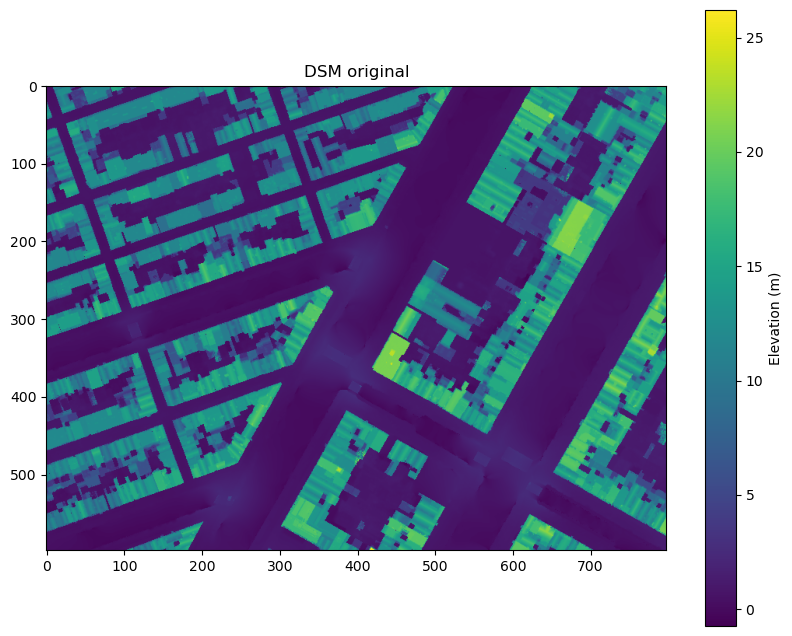

In [29]:
plot_raster(dems.dsm[0])

In [21]:
from osgeo import gdal
from util.misc import saveraster
dsm_path = "output/updated_chm.tif"
gdal_dsm = gdal.Open(dsm_path)
saveraster(gdal_dsm, "output/building1inserted2.tif", dems.dsm[2])

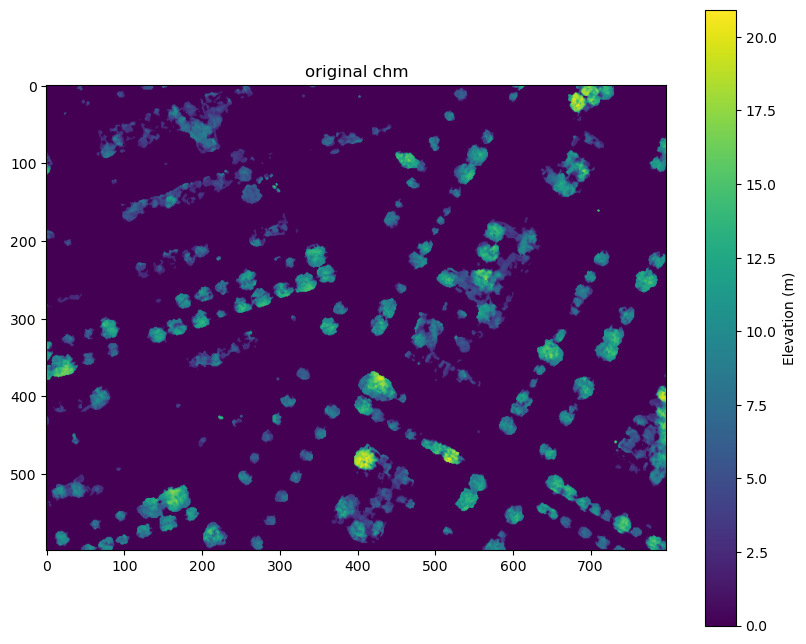

In [22]:
plot_raster(chm.chm, "original chm")

In [23]:
chm.remove_trees(1)
chm.remove_trees(2)
chm.remove_trees(3)

CPLE_AppDefinedError: Deleting output/updated_chm.tif failed: Permission denied

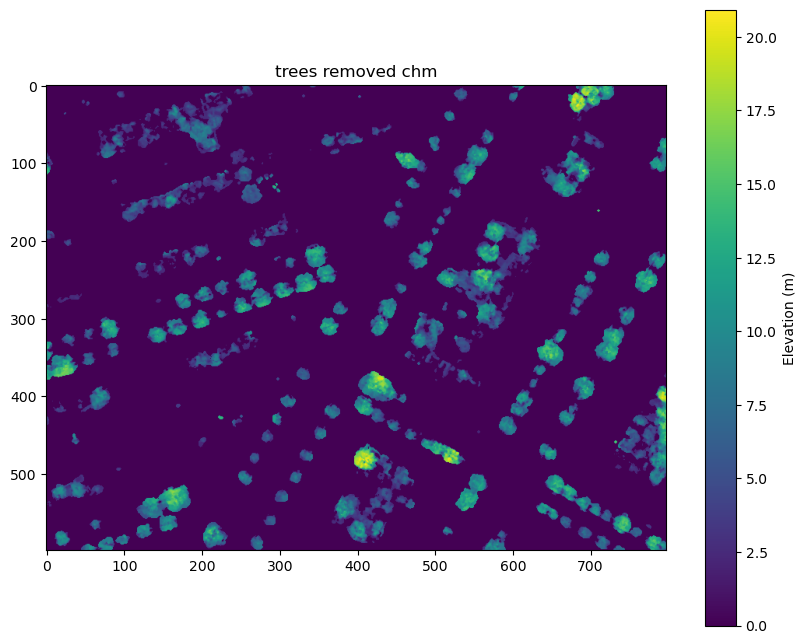

In [16]:
plot_raster(chm.chm, "trees removed chm")

In [17]:
chm.insert_tree((452, 139), 20, 20, trunk_height=5.0)

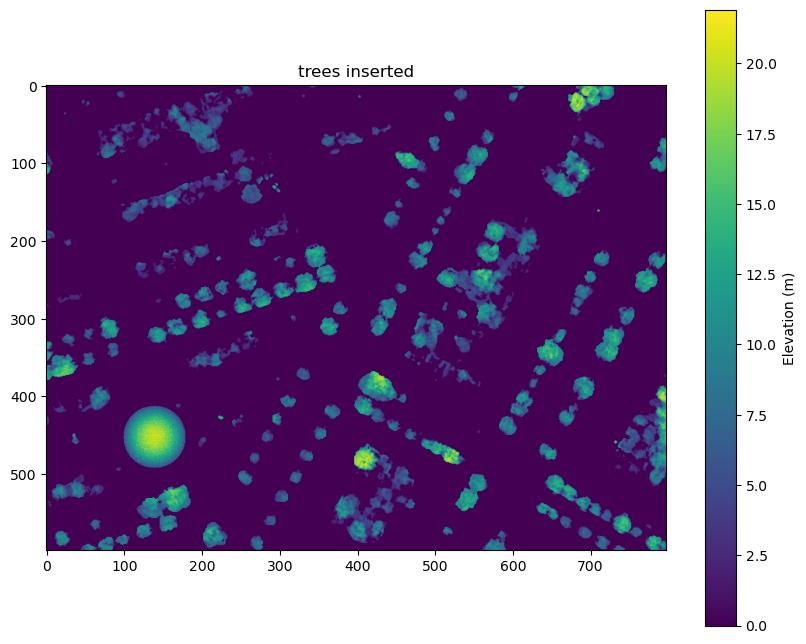

In [18]:
plot_raster(chm.chm, "trees inserted")

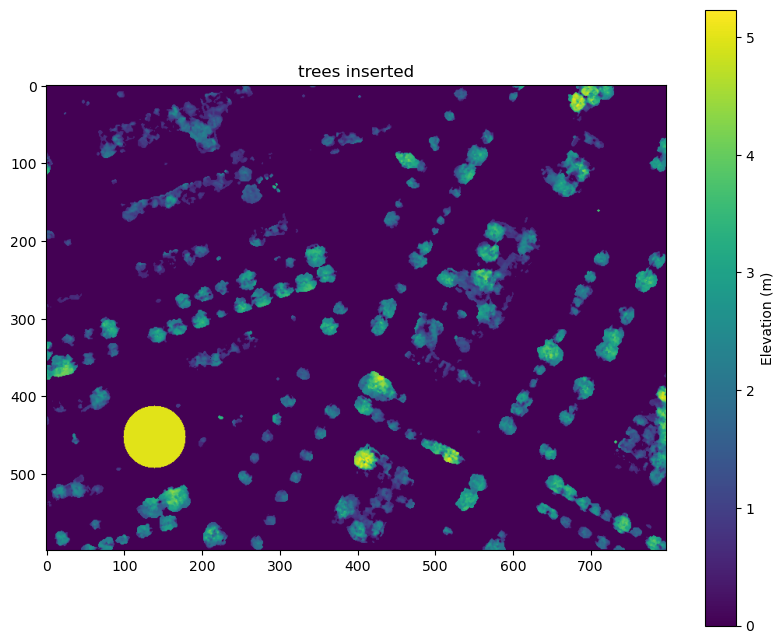

In [19]:
plot_raster(chm.trunk_array, "trees inserted")

In [37]:

import geopandas as gpd
from shapely.geometry import shape
from pyproj import CRS

# Create a GeoDataFrame from polygons
# gdf = gpd.GeoDataFrame(chm.tree_polygons, geometry=[p["geometry"] for p in chm.tree_polygons], crs=CRS.from_epsg(28992))
#
# # Save to GeoJSON
# gdf.to_file("output/tree_clusters_test.geojson", driver="GeoJSON")

In [21]:
from osgeo import gdal
dsm_path = "output/updated_chm.tif"
gdal_dsm = gdal.Open(dsm_path)
saveraster(gdal_dsm, "output/maskog.tif", maskog[0])
saveraster(gdal_dsm, "output/maskremoved.tif", listmasks[0])

NameError: name 'maskog' is not defined

In [21]:
dems.export_context("output/contexttest.dxf")

Exported data to output/contexttest.dxf
